In [1]:
import os
import paltas
from astropy.visualization import simple_norm
import visualization_utils
from paltas import generate
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline
root_path = paltas.__path__[0][:-7]
import re

/Users/padmavenkatraman/Documents/StrongLensing/silver/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
%load_ext autoreload
%autoreload 2

### paltas PSF library

In [5]:
psf_im = np.load('data/psf_images.npy')

In [9]:
psf_im_i = psf_im[:, 1, :, :]

(201850, 32, 32)

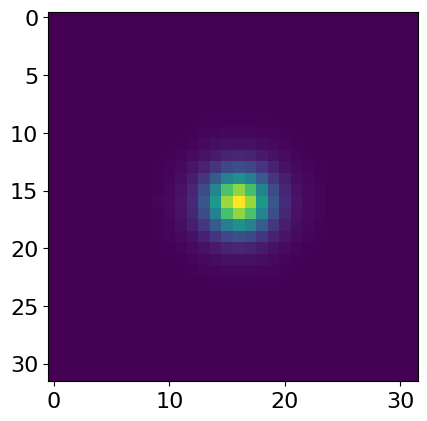

In [50]:
# index = np.random.randint(0, psf_im_i.shape[0])
index = 0
psf_kernels = psf_im_i[index, :, :]
psf_kernels[psf_kernels<0] = 0
plt.imshow(psf_kernels);

In [52]:
psf_sums = np.sum(psf_im_i,axis=(1,2))

In [55]:
psf_sums = psf_sums.reshape(-1,1,1)

In [66]:
normalized = psf_im_i/psf_sums
normalized.shape

(201850, 32, 32)

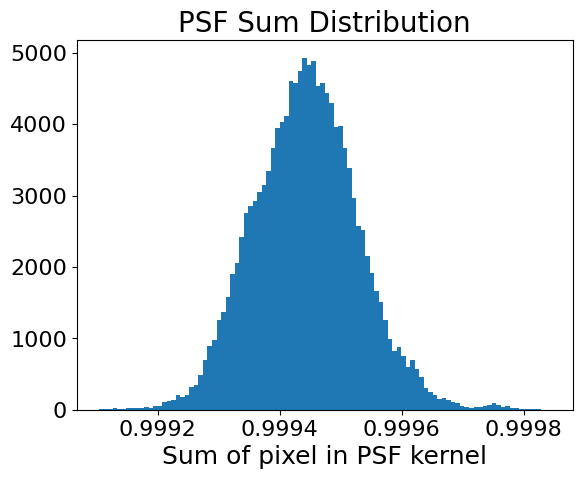

In [64]:
plt.hist(psf_sums.flatten(), density=True, bins=100);
plt.title("PSF Sum Distribution")
plt.xlabel("Sum of pixel in PSF kernel");

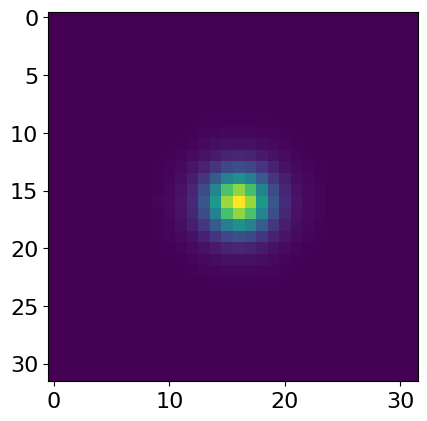

In [68]:
index = 0
psf_kernels = normalized[index, :, :]
psf_kernels[psf_kernels<0] = 0
plt.imshow(psf_kernels);

In [69]:
config_file = 'config_LSST'

In [73]:
from paltas.Configs.config_handler import ConfigHandler

# We'll pass one of our example Configs in
config_handler = ConfigHandler(os.path.join(root_path,f'{config_file}.py'))

# First let's get the lenstronomy model lists, kwargs lists, and redshift lists.
kwargs_model, kwargs_params = config_handler.get_lenstronomy_models_kwargs()

# We can see what keys are returned, and inspect the lens models in particular
print('Available Keys:')
print(kwargs_model.keys())
print(kwargs_params.keys())
print('')

print('lens_model_list')
print(kwargs_model['lens_model_list'])
print('kwargs_lens')
print(kwargs_params['kwargs_lens'])

ValueError: Not all of the required parameters for the parameterization are present.

In [60]:
all_samples = config_handler.get_sample_dict()

In [61]:
plt_counter = 0
new_plot_dict = {}
for k, v in all_samples.items():
    for k1, v1 in v.items():
        try:
            sample_v1 = [v1() for i in range(10000)]
            v[k1] = sample_v1
            plt_counter +=1
            new_plot_dict[f'{k} - {k1}'] = sample_v1
        except:
            print(f'{v1} is not a distribution - will not be sampling.')

None is not a distribution - will not be sampling.
0.0 is not a distribution - will not be sampling.
0.0 is not a distribution - will not be sampling.
27.79 is not a distribution - will not be sampling.
planck18 is not a distribution - will not be sampling.
GAUSSIAN is not a distribution - will not be sampling.
0.71 is not a distribution - will not be sampling.
0.2 is not a distribution - will not be sampling.
2.3 is not a distribution - will not be sampling.
10 is not a distribution - will not be sampling.
27.79 is not a distribution - will not be sampling.
15 is not a distribution - will not be sampling.
20.48 is not a distribution - will not be sampling.
460 is not a distribution - will not be sampling.
None is not a distribution - will not be sampling.


In [62]:
# only for complicated HST PSF
# del new_plot_dict['psf - kernel_point_source']

In [63]:
keys = list(new_plot_dict.keys())
values = list(new_plot_dict.values())
unique_cats = np.unique(np.array([re.split(r' - ', i)[0] for i in keys]))
color=['y', 'k', 'r', 'b', 'm']
cat_to_color=dict(zip(unique_cats, color))
val_to_color = {}
for k in keys:
    for i in unique_cats:
        if i in k:

            val_to_color[k] = cat_to_color[i]



IndexError: list index out of range

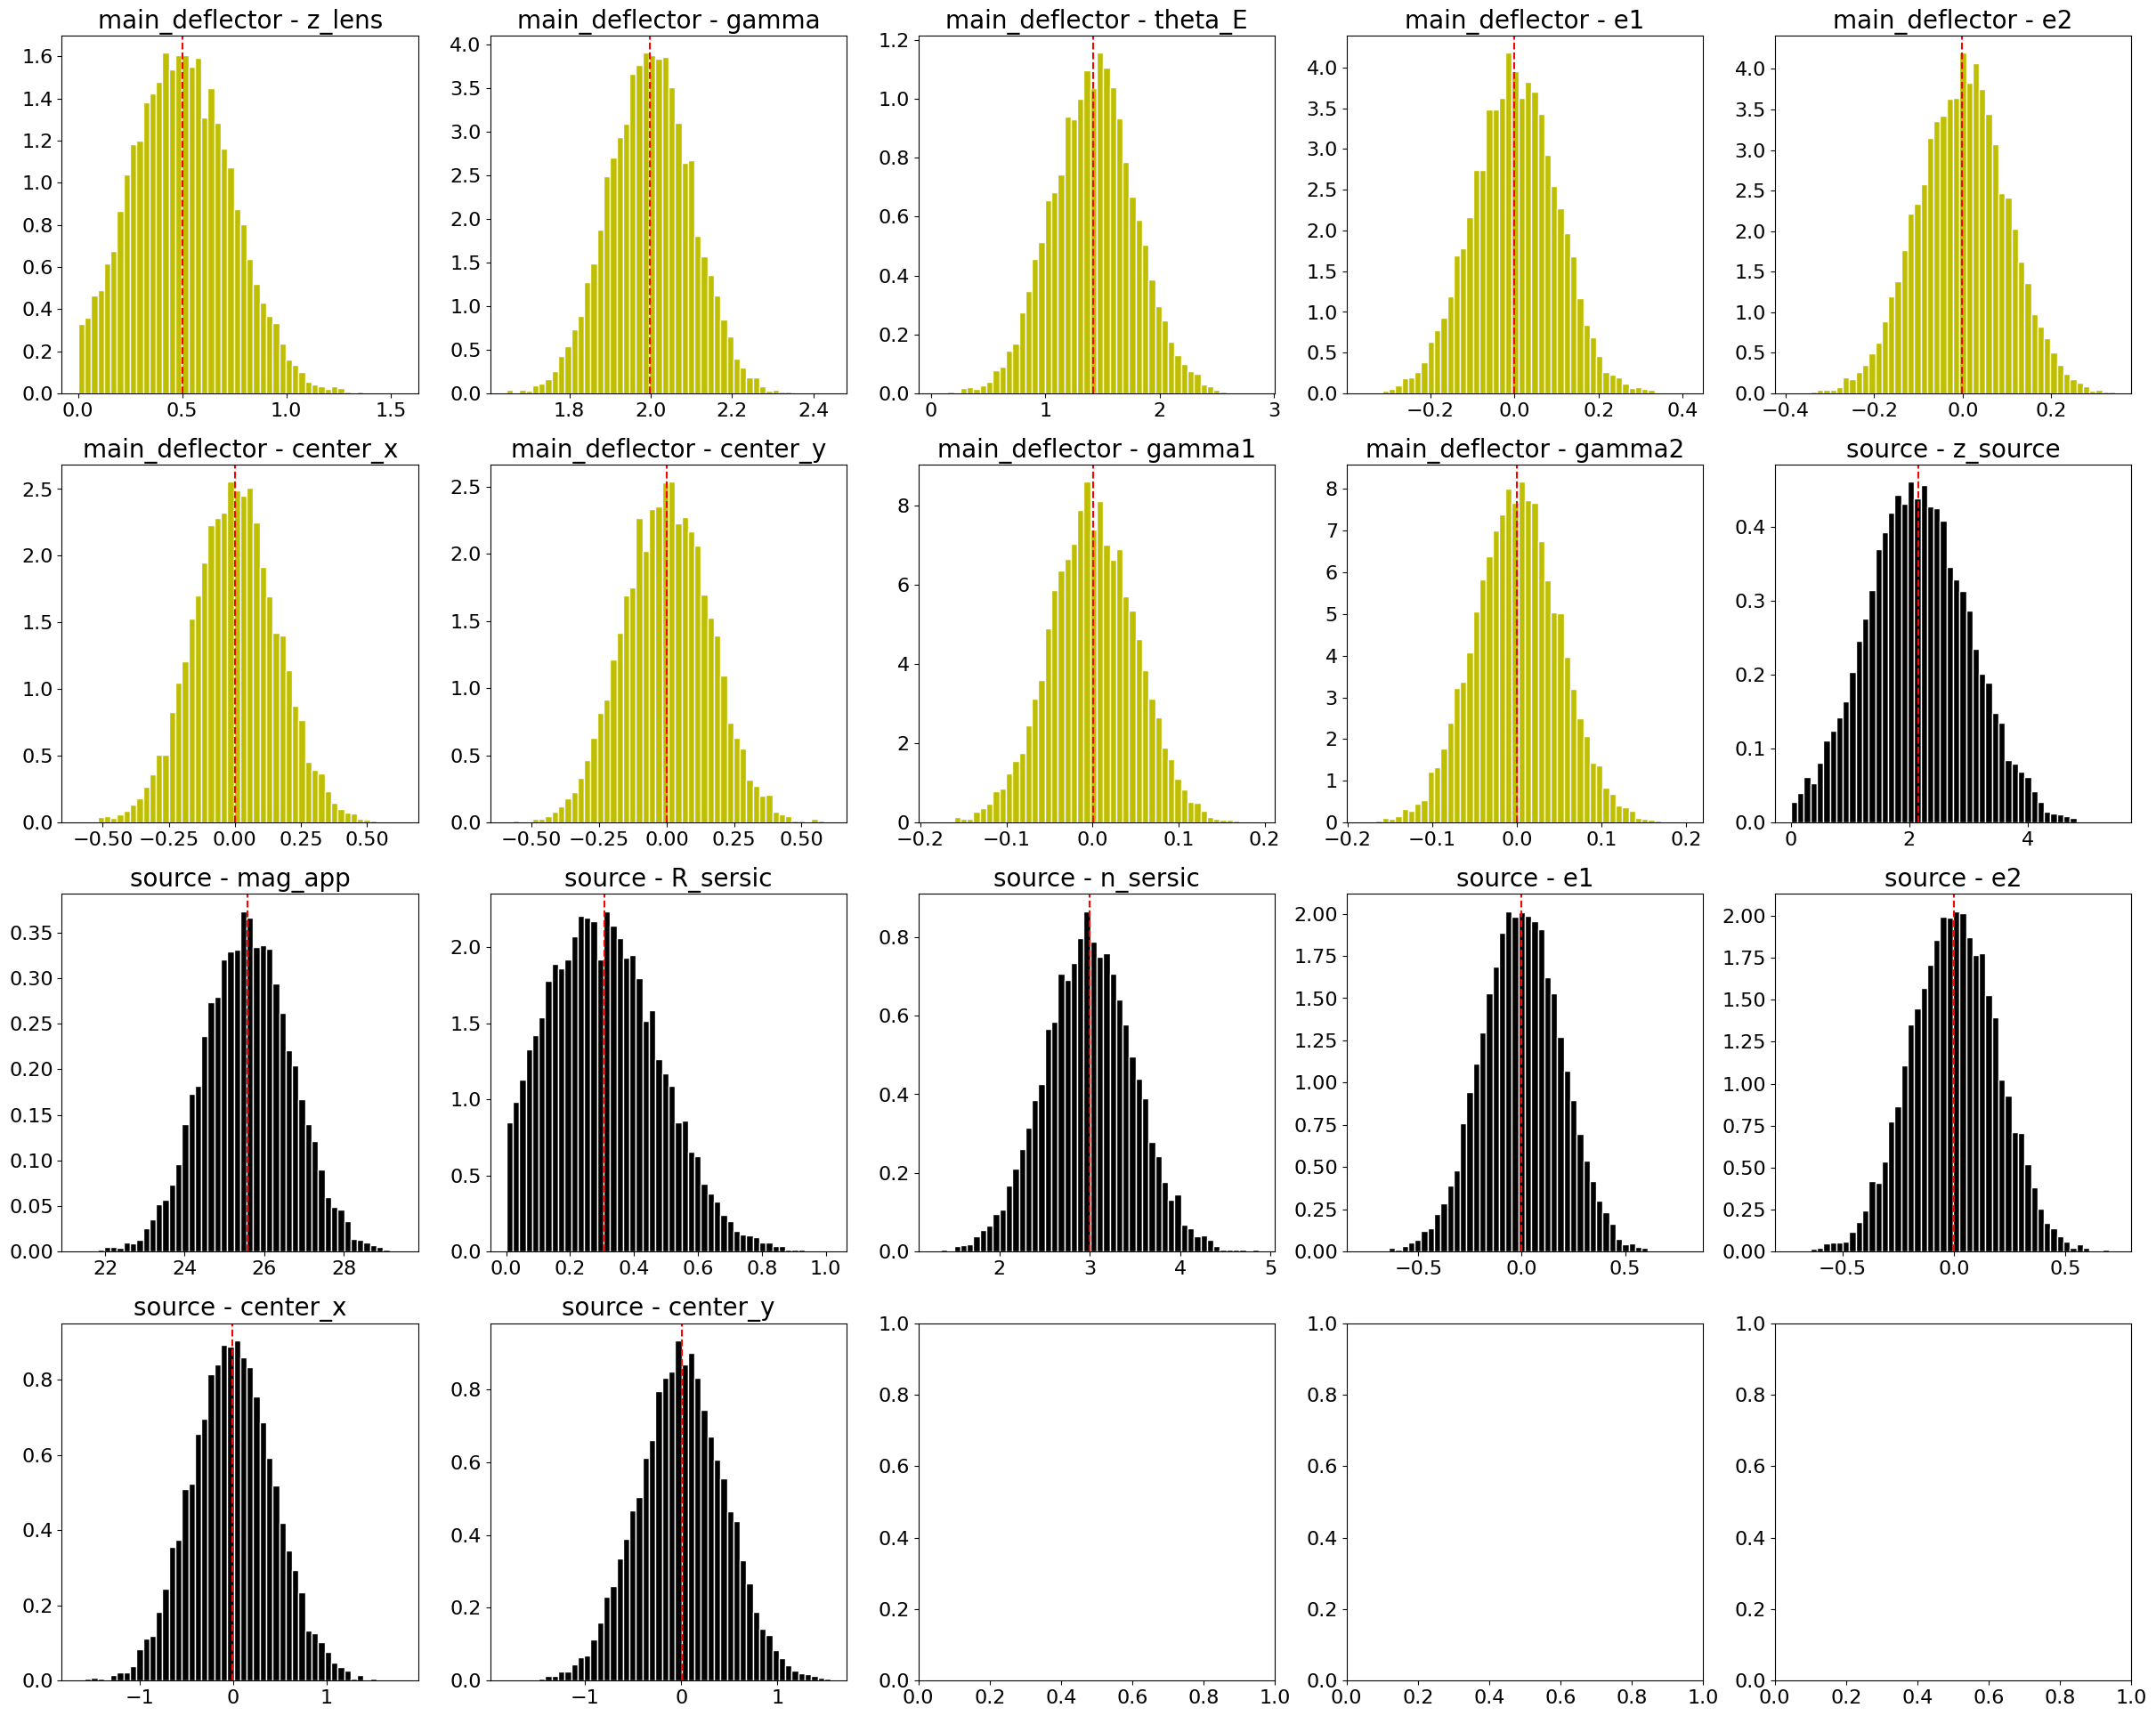

In [64]:
fig, axs = plt.subplots(4, 5, 
                        figsize=(30,24))

for i, ax in enumerate(axs.flatten()):
    ax.hist(np.array(values[i]).flatten(), 50, color=val_to_color[keys[i]][0], edgecolor='white', density=True)
    ax.axvline(np.mean(values[i]), color='r', ls='--')
    ax.set_title(f'{keys[i]}')

plt.tight_layout()
plt.show()


In [65]:


os.system(command = f'python3 ../paltas/generate.py {config_file}.py {config_file} --n 100 --tf_record')


/Users/padmavenkatraman/Documents/StrongLensing/silver/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


Save folder path: phil_config


  0%|          | 0/100 [00:00<?, ?it/s]

Dataset generation complete. Acceptance rate: 0.769


100%|██████████| 100/100 [00:00<00:00, 2175.04it/s]


0

In [66]:
file_list = [os.path.join(config_file, i) for i in os.listdir(config_file)]
names = np.arange(100).astype(str)


In [67]:
file_list[0]

'phil_config/image_0000022.npy'

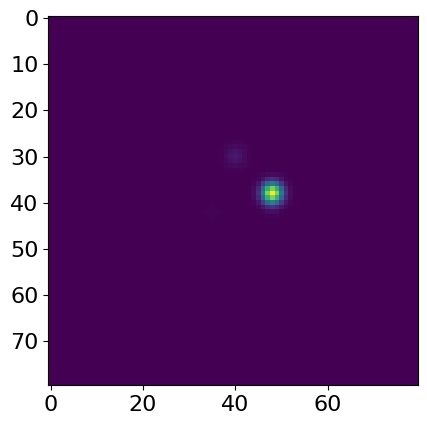

In [68]:
plt.imshow(np.load(file_list[0]), norm='linear')

(372, 2976, 4)
(372, 2976, 4)


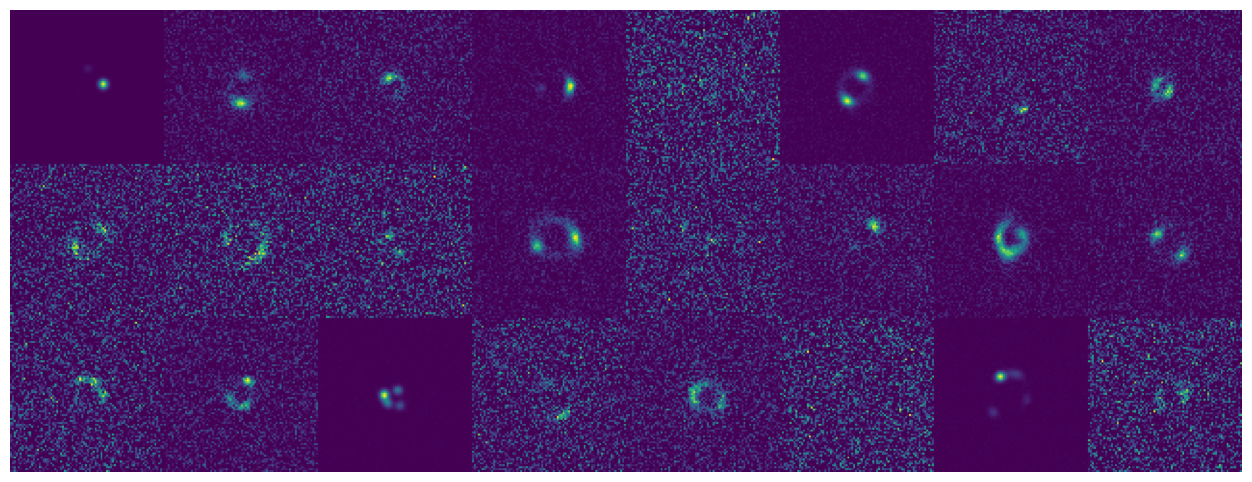

In [69]:
visualization_utils.matrix_plot_from_npy(file_list[:24],names=names[:24],dim=(3,8),
                                         save_name='lsst.png',annotate=False)

In [71]:

from scipy.stats import norm, uniform, truncnorm, randint
truncnorm(-4.,np.inf,loc=0.8,scale=0.2).rvs()

0.5662009283162188